In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
N = 32
p = 3

sim = AdvectionSolver(
    ic=lambda idx, x, y, z, t, xp: ic.square(idx, x, y, z, vx=1, vy=1, xp=xp),
    nx=N,
    ny=N,
    p=p,
    interpolation_scheme="transverse",
    MOOD=True,
    max_MOOD_iters=1,
    PAD={"rho": (0.0, 1.0)},
    PAD_atol=1e-15,
)

In [3]:
sim.euler(n=5)

100%|██████████| 5/5 [00:00<00:00, 139.91it/s]


In [4]:
np.min(sim.minisnapshots["min_rho"]), np.max(sim.minisnapshots["max_rho"])

(np.float64(-0.055085440134690855), np.float64(1.0058506212837603))

In [5]:
sim.MOOD_config

MOODConfig(iter_idx=1, iter_count=1, max_iters=1, cascade=['fv3', 'fv0'], cascade_status=[True, True], NAD=False, NAD_rtol=1.0, NAD_atol=0.0, global_dmp=False, include_corners=False, PAD=True, PAD_atol=1e-15, SED=False)

Text(0, 0.5, 'MOOD iterations/step')

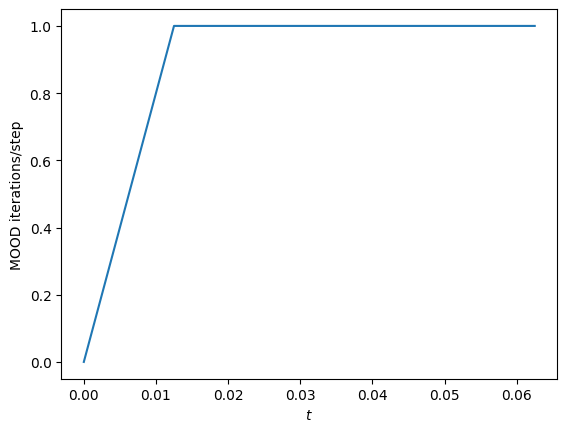

In [6]:
plt.plot(sim.minisnapshots["t"], sim.minisnapshots["MOOD_iters"])
plt.xlabel(r"$t$")
plt.ylabel(r"MOOD iterations/step")

/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.484375
  warnings.warn(
/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.484375
  warnings.warn(


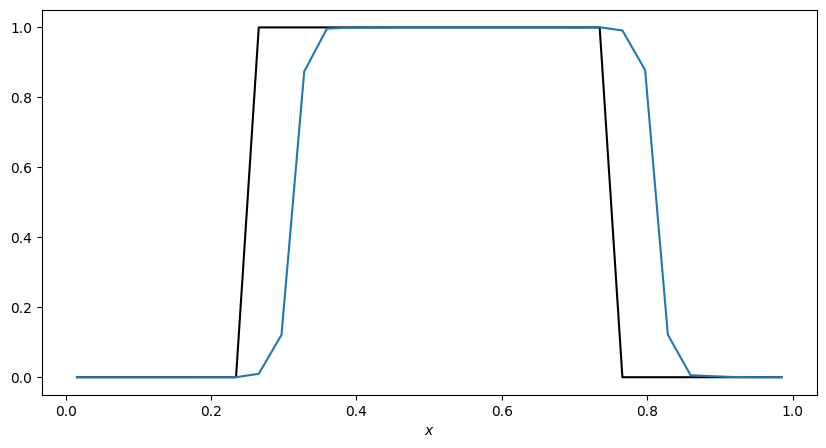

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, y=0.5, t=0, color="k")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, y=0.5, xlabel=True)

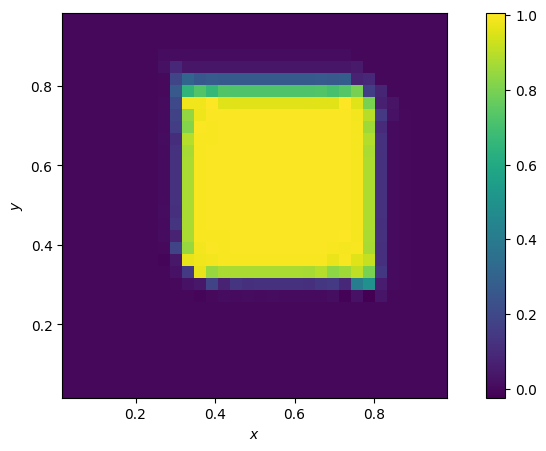

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_2d_slice(sim, ax, "rho", cell_averaged=True)
ax.figure.colorbar(ax.images[0], ax=ax)

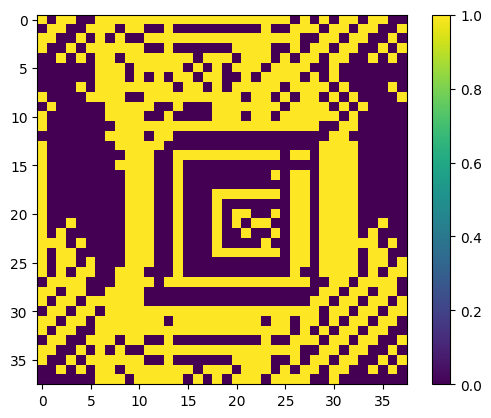

In [9]:
plt.imshow(sim.arrays["_cascade_idx_array_"][0, :, :, 0])
plt.colorbar()

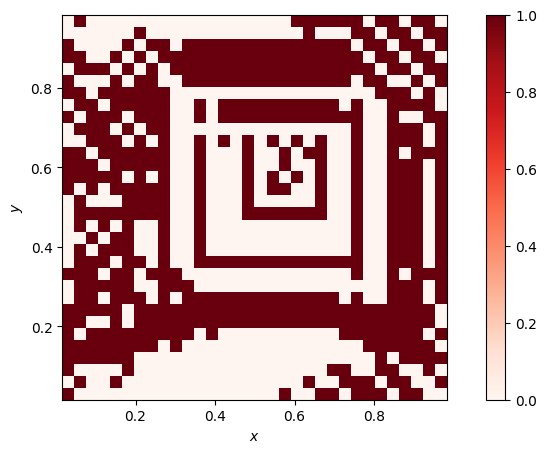

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_2d_slice(sim, ax, "troubles", cmap=plt.cm.Reds)
ax.figure.colorbar(ax.images[0], ax=ax)

In [11]:
sim.timer.print_report()

Category                                               Calls      Cumulative Time
-----------------------------------------------------------------------------------
!ExplicitODESolver.integrate.body                          1                 0.05
AdvectionSolver.log_quantity                               7                 0.00
ExplicitODESolver.integrate                                1                 0.07
ExplicitODESolver.take_step                                5                 0.04
FiniteVolumeSolver.f                                       5                 0.03
FiniteVolumeSolver.inplace_apply_bc                       52                 0.00
FiniteVolumeSolver.inplace_compute_fluxes                 10                 0.03
FiniteVolumeSolver.inplace_integrate_fluxes               20                 0.01
FiniteVolumeSolver.inplace_interpolate_faces              20                 0.02
FiniteVolumeSolver.riemann_solver                         20                 0.00
current_step  